In [2]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Abrimos la tabla final creada a partir de las funciones en la que podemos ver un resumen de la cantidad de tweets de Trump y los datos del índice Nasdaq esos días.

### Realizamos los últimos ajustes de limpieza

In [9]:
data = pd.read_csv("data/tabla_final.csv")

In [10]:
df = pd.DataFrame(data)

In [11]:
df = df[['Date','Open','Close','crecimiento',"%", "tweet_count", "tweets"]]

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df["year"]= df["Date"].dt.year

In [14]:
media_al_día = df.groupby("year")["tweet_count"].mean()

In [15]:
media_creci = df.groupby("year")["%"].mean()

In [16]:
df1 = df.join(media_al_día, on= ["year"],how='inner', lsuffix='_left', rsuffix='_right')

In [17]:
df2 = df1.join(media_creci, on= ["year"],how='inner', lsuffix='_left', rsuffix='_right')

In [18]:
df2.rename(columns = {"%_left":"%", 
                   "tweet_count_left":"tweet count",
                   "tweet_count_right":"media tweets día",
                   "%_right":"media % creci al día"}, inplace=True)

# Ahora sí la tabla está completa.

In [19]:
df2

,Date,Open,Close,crecimiento,%,tweet count,tweets,year,media tweets día,media % creci al día
0,2016-10-20,5238.200195,5241.830078,3.629883,0.069248,78,Más de 35,2016,10.759825,0.060753
1,2016-05-18,4705.779785,4739.120117,33.340332,0.703513,47,Más de 35,2016,10.759825,0.060753
2,2016-10-05,5305.279785,5316.020020,10.740235,0.202035,46,Más de 35,2016,10.759825,0.060753
3,2016-09-27,5254.180176,5305.709961,51.529785,0.971214,43,Más de 35,2016,10.759825,0.060753
4,2016-10-10,5318.459961,5328.669922,10.209961,0.191604,42,Más de 35,2016,10.759825,0.060753
...,...,...,...,...,...,...,...,...,...,...
440,2020-01-02,9039.459961,9092.190430,52.730469,0.579953,9,Resto,2020,9.250000,0.284297
646,2020-01-06,8943.500000,9071.469727,127.969727,1.410684,6,Resto,2020,9.250000,0.284297
721,2020-01-07,9076.639648,9068.580078,-8.059570,-0.088874,6,Resto,2020,9.250000,0.284297
870,2020-01-14,9270.610352,9251.330078,-19.280274,-0.208405,3,Menos de 6,2020,9.250000,0.284297


### Nos muestra la media de tweets diarios a lo largo de los últimos 4 años. 

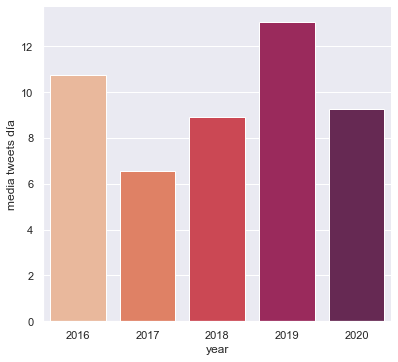

In [20]:
sns.set_theme(style="darkgrid")
palette = sns.color_palette("rocket_r")

fig1 = sns.catplot(
    data=df2, kind="bar",
    x="year", y="media tweets día",palette=palette, size=5, aspect=1.1)

## Esta figura tiene en cuenta sólo la cantidad de tweets diarios y nos muestra la media.

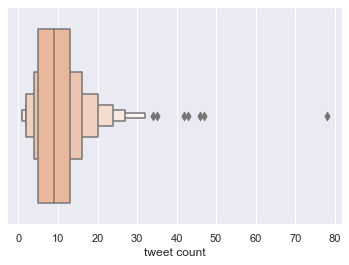

In [21]:
sns.set_theme(style="darkgrid")
palette = sns.color_palette("rocket_r")
fig2 = sns.boxenplot(data= df2, x = "tweet count",palette=palette)

## La figura nos dibuja el porcentaje medio de crecimiento/decrecimiento diaro en el periodo que va de 2016 a 2020

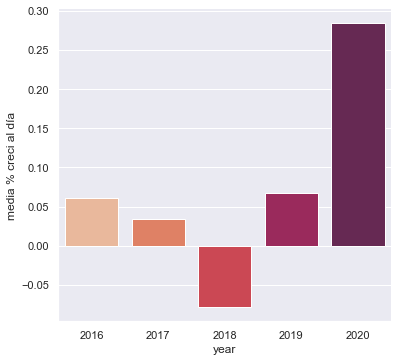

In [22]:
sns.set_theme(style="darkgrid")
palette = sns.color_palette("rocket_r")

fig3 = sns.catplot(
    data=df2, kind="bar",
    x="year", y="media % creci al día", palette=palette, size=5, aspect=1.1)

## Muestra los puntos que de media el Nasdaq sube o baja diariamente. 

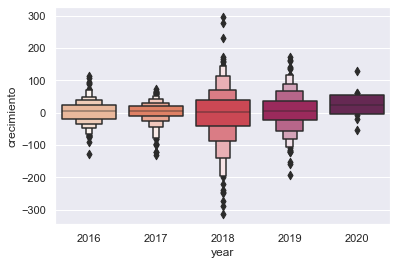

In [23]:
sns.set_theme(style="darkgrid")
palette = sns.color_palette("rocket_r")
fig4 = sns.boxenplot(data= df2, x = "year", y= "crecimiento", palette=palette)

# Intentamos contestar la hipotesis con esta grafica,  y observamos que los días que Donald estuvo más activo el indice Nasdaq no se vió repercutido, todo lo contrario, aun que las subidas no superaran el 1%.

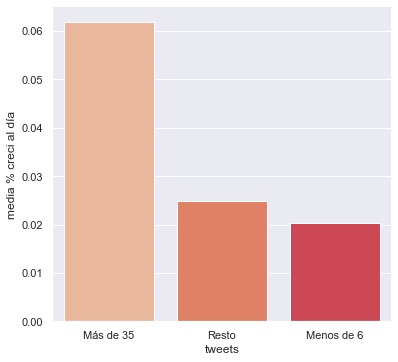

In [24]:
fig5 = sns.catplot(
    data=df2, kind="bar",
    x="tweets", y="media % creci al día", palette=palette, size=5, aspect=1.1, ci= None)

In [25]:
fig1.savefig('output/grafico1.png')
#fig2.savefig('output/grafico2.png')
fig3.savefig('output/grafico3.png')
#fig4.savefig('output/grafico4.png')
fig5.savefig('output/grafico5.png')

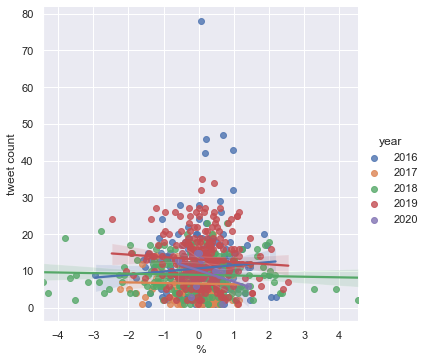

In [29]:
sns.lmplot(
    data=df2,
    x="%", y="tweet count", hue = "year")